<a href="https://colab.research.google.com/github/casten/CovidGraphs/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Utilities**

In [0]:
import numpy as np
import pandas as pd

# Gets top 10 counties by final case count
def getTopTenCountiesBySize(data):
  end_date = pd.to_datetime(data['date']).max()
  latest_numbers = data[pd.to_datetime(data['date']) == end_date]
  byCases = latest_numbers.sort_values('cases', ascending=False)
  return byCases[0:10]


Load data for NYT github site, merge county + state data, remove unneeded cols, cleanup

In [183]:

df = pd.read_csv("https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv?raw=true") #, nrows=1000)
df.drop(columns=['fips'])
df.drop(columns=['deaths'])
for i, row in df.iterrows():
    df.at[i,'county'] = df.at[i,'county']+',  '+df.at[i,'state']
df.drop(columns=['state'])


,date,county,fips,cases,deaths
0,2020-01-21,"Snohomish, Washington",53061.0,1,0
1,2020-01-22,"Snohomish, Washington",53061.0,1,0
2,2020-01-23,"Snohomish, Washington",53061.0,1,0
3,2020-01-24,"Cook, Illinois",17031.0,1,0
4,2020-01-24,"Snohomish, Washington",53061.0,1,0
...,...,...,...,...,...
150164,2020-05-16,"Sublette, Wyoming",56035.0,3,0
150165,2020-05-16,"Sweetwater, Wyoming",56037.0,23,0
150166,2020-05-16,"Teton, Wyoming",56039.0,100,1
150167,2020-05-16,"Uinta, Wyoming",56041.0,10,0


Start analysis with getting top 10 by final case count

In [0]:


topTen = getTopTenCountiesBySize(df)

df = df[df['county'].isin(topTen['county'])]

df.index = pd.to_datetime(df['date'])
df.drop(columns=['date'])
piv = df.pivot(index='date' , columns='county', values='cases')

Plot the data

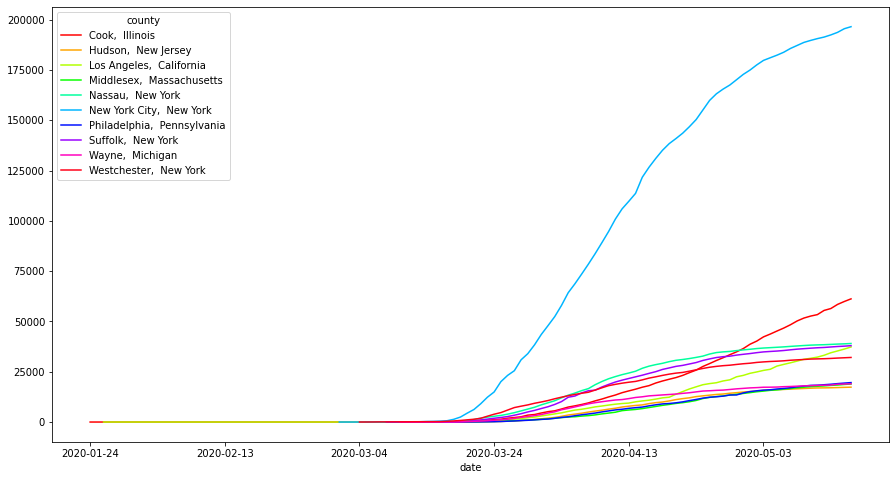

In [185]:
axes = piv.plot(figsize=(15,8), colormap='hsv')

Show March 15 onward

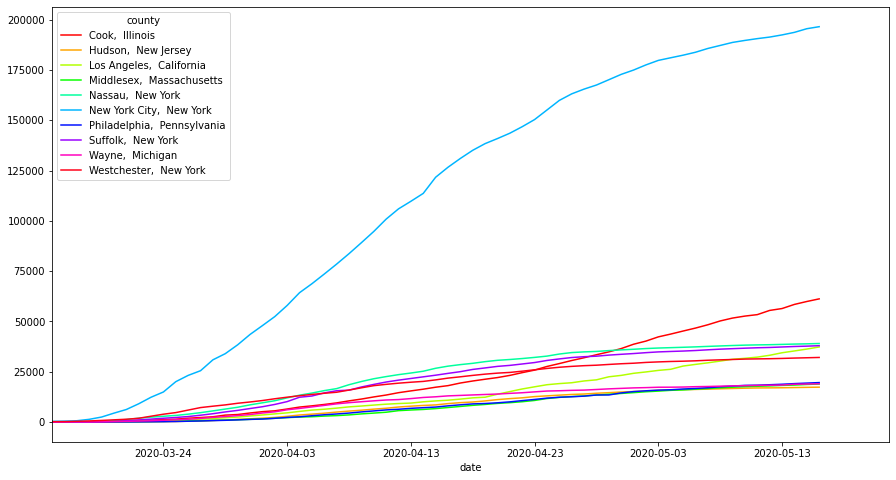

In [186]:
piv.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-03-15'), colormap='hsv')

Convert data to increase rate

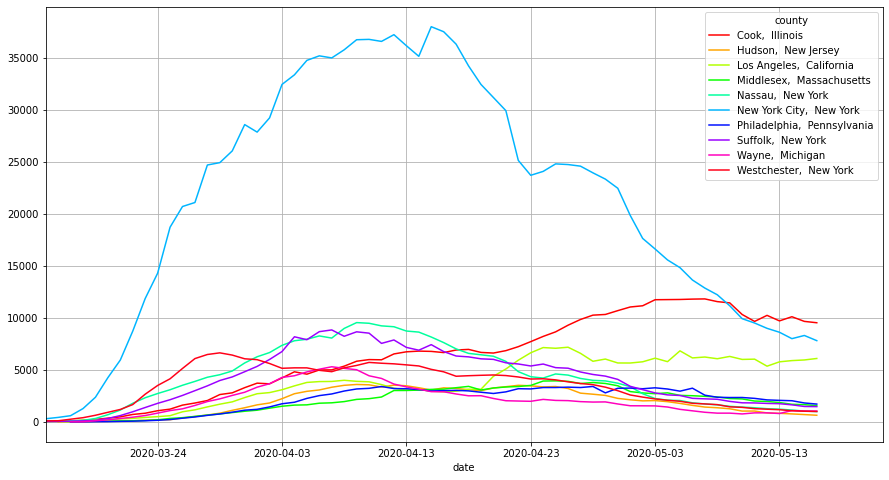

In [187]:
diff = piv.diff(periods=7)
diff.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-03-15'), grid=True, colormap='hsv')